# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [30]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

  Using cached smdebug-1.0.12-py2.py3-none-any.whl (270 kB)
  Using cached pyinstrument-3.4.2-py2.py3-none-any.whl (83 kB)
  Using cached pyinstrument_cext-0.2.4-cp37-cp37m-manylinux2010_x86_64.whl (20 kB)

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [2]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3
import os
import numpy as np
import pandas as pd
from sagemaker import get_execution_role
from sagemaker.session import Session
from sagemaker.debugger import Rule, DebuggerHookConfig, ProfilerConfig, FrameworkProfile, Rule, ProfilerRule, rule_configs, TensorBoardOutputConfig
from sagemaker.pytorch import PyTorch
from sagemaker.predictor import Predictor
from sagemaker.tuner import (IntegerParameter, CategoricalParameter, ContinuousParameter, HyperparameterTuner)
from sagemaker.debugger import CollectionConfig
from sagemaker.pytorch import PyTorchModel

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [4]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

--2022-08-20 08:15:49--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.120.0
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.120.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  26.5MB/s    in 29s     

2022-08-20 08:16:19 (37.5 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.Affe

### Upload to S3

In [3]:
import sagemaker
from sagemaker import get_execution_role

session = sagemaker.session.Session()

bucket= session.default_bucket()
print("Default Bucket: {}".format(bucket))

region = session.boto_region_name
print("AWS Region: {}".format(region))

role = get_execution_role()
print("RoleArn: {}".format(role))

Default Bucket: sagemaker-us-east-1-205796979488
AWS Region: us-east-1
RoleArn: arn:aws:iam::205796979488:role/service-role/AmazonSageMaker-ExecutionRole-20220820T095512


In [8]:
os.environ["DEFAULT_S3_BUCKET"] = bucket
!aws s3 sync ./dogImages s3://${DEFAULT_S3_BUCKET}/project3/dogImages

upload: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg to s3://sagemaker-us-east-1-205796979488/project3/dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg to s3://sagemaker-us-east-1-205796979488/project3/dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg to s3://sagemaker-us-east-1-205796979488/project3/dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00048.jpg to s3://sagemaker-us-east-1-205796979488/project3/dogImages/test/001.Affenpinscher/Affenpinscher_00048.jpg
upload: dogImages/test/002.Afghan_hound/Afghan_hound_00141.jpg to s3://sagemaker-us-east-1-205796979488/project3/dogImages/test/002.Afghan_hound/Afghan_hound_00141.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00058.jpg to s3://sagemaker-us-east-1-205796979488/project3/dogImages/test/001.Affenpinsc

In [27]:
test_dir = "s3://sagemaker-us-east-1-205796979488/"

#test_images = os.listdir(test_dir)[:5]
test_images = fs.ls('sagemaker-us-east-1-205796979488/project3/dogImages/test/')[:5]
test_images

['sagemaker-us-east-1-205796979488/project3/dogImages/test/001.Affenpinscher',
 'sagemaker-us-east-1-205796979488/project3/dogImages/test/002.Afghan_hound',
 'sagemaker-us-east-1-205796979488/project3/dogImages/test/003.Airedale_terrier',
 'sagemaker-us-east-1-205796979488/project3/dogImages/test/004.Akita',
 'sagemaker-us-east-1-205796979488/project3/dogImages/test/005.Alaskan_malamute']

In [ ]:
with open(test_file_path , "rb") as f:
        payload = f.read()
        print("Image to be tested:")
        display(Image.open(io.BytesIO(payload)))

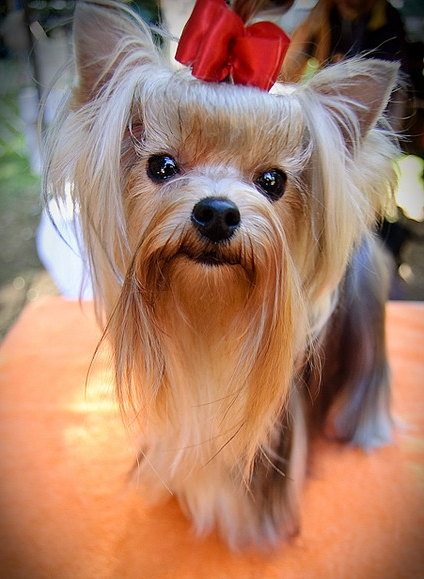

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import s3fs
import io

fs = s3fs.S3FileSystem()

# To List 5 files in your accessible bucket
fs.ls('sagemaker-us-east-1-205796979488/project3/dogImages/test/')[:5]

with fs.open(f'sagemaker-us-east-1-205796979488/project3/dogImages/valid/133.Yorkshire_terrier/Yorkshire_terrier_08348.jpg') as f:
        payload = f.read()
        display(Image.open(io.BytesIO(payload)))
    
plt.show()


## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [4]:
from sagemaker.tuner import(
IntegerParameter,
CategoricalParameter,
ContinuousParameter,
HyperparameterTuner
)

In [5]:
#TODO: Create estimators for your HPs
from sagemaker.pytorch import PyTorch

estimator = PyTorch(
    entry_point="hpo.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    #instance_type="ml.m5.large"
    instance_type="ml.g4dn.xlarge"
)

hyperparameter_ranges = {
    "lr": ContinuousParameter(0.001, 0.1),
    "batch_size": CategoricalParameter([32, 64, 128, 256]),
    "epochs": IntegerParameter(2,3)
}

objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]


tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=2,
    objective_type=objective_type,
)

In [34]:
os.environ['SM_CHANNEL_TRAINING'] = 's3://sagemaker-us-east-1-205796979488/project3/dogImages/'
os.environ['SM_MODEL_DIR'] = 's3://sagemaker-us-east-1-205796979488/project3/dogImages/model/'
os.environ['SM_OUTPUT_DATA_DIR'] = 's3://sagemaker-us-east-1-205796979488/project3/dogImages/output/'

print(f"Environment : Data_Dir: {os.environ['SM_CHANNEL_TRAINING']}, Model_Dir: {os.environ['SM_MODEL_DIR']}")
                                    

Environment : Data_Dir: s3://sagemaker-us-east-1-205796979488/project3/dogImages/, Model_Dir: s3://sagemaker-us-east-1-205796979488/project3/dogImages/model/


In [35]:
print(os.environ)

environ({'REGION_NAME': 'us-east-1', 'HOSTNAME': 'datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395', 'CONDA_MD5': 'd63adf39f2c220950a063e0529d4ff74', 'HOME': '/root', 'CONDA_VERSION': 'py38_4.8.3', 'AWS_CONTAINER_CREDENTIALS_RELATIVE_URI': '/_sagemaker-instance-credentials/5176d245db516a5c6f79f596bb66e3d1650c7be6003b38a94d0891b78469cc1f', 'PYTHONNOUSERSITE': '0', 'AWS_DEFAULT_REGION': 'us-east-1', 'PATH': '/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/opt/amazon/bin:/tmp/miniconda3/condabin:/tmp/anaconda3/condabin:/tmp/miniconda2/condabin:/tmp/anaconda2/condabin', 'LANG': 'C.UTF-8', 'AWS_ACCOUNT_ID': '205796979488', 'DEBIAN_FRONTEND': 'noninteractive', 'SHELL': '/bin/bash', 'AWS_REGION': 'us-east-1', 'AWS_INTERNAL_IMAGE_OWNER': 'Studio', 'CONDA_DIR': '/opt/.sagemakerinternal/conda', 'LC_ALL': 'C.UTF-8', 'PWD': '/root', 'AWS_SAGEMAKER_PYTHONNOUSERSITE': '0', 'SAGEMAKER_LOG_FILE': '/var/log/studio/kernel_gateway.log', 'JUPYTER_PATH': '/opt/conda/sh

In [20]:
print(f"Environment : Data_Dir: {os.environ['SM_CHANNEL_TRAINING']}, Model_Dir: {os.environ['SM_MODEL_DIR']}")

Environment : Data_Dir: s3://sagemaker-us-east-1-205796979488/project3/dogImages/, Model_Dir: s3://sagemaker-us-east-1-205796979488/project3/dogImages/model/


In [ ]:
# TODO: Fit your HP Tuner


input_data = 's3://sagemaker-us-east-1-205796979488/project3/dogImages/'
tuner.fit({'training': input_data}, wait=True) # TODO: Remember to include your data channels

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


............................................................................................................................................................

In [36]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2022-08-23 06:25:52 Starting - Found matching resource for reuse
2022-08-23 06:25:52 Downloading - Downloading input data
2022-08-23 06:25:52 Training - Training image download completed. Training in progress.
2022-08-23 06:25:52 Uploading - Uploading generated training model
2022-08-23 06:25:52 Completed - Resource released due to keep alive period expiry


{'_tuning_objective_metric': '"average test loss"',
 'batch_size': '"128"',
 'epochs': '3',
 'lr': '0.002806969123334442',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2022-08-23-06-05-13-875"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-205796979488/pytorch-training-2022-08-23-06-05-13-875/source/sourcedir.tar.gz"'}

In [37]:

hyperparameters={'lr':best_estimator.hyperparameters()['lr'],
                 'batch_size':int(best_estimator.hyperparameters()['batch_size'].replace('"',"")),
                 'epochs':best_estimator.hyperparameters()['epochs']}

print(f"Best Hyperparamters: \n {hyperparameters}")

Best Hyperparamters: 
 {'lr': '0.002806969123334442', 'batch_size': 128, 'epochs': '3'}


## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [99]:
# TODO: Set up debugging and profiling rules and hooks
from sagemaker.debugger import (
    Rule,
    DebuggerHookConfig,
    rule_configs,
    ProfilerConfig, 
    FrameworkProfile
)

rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]

hook_config = DebuggerHookConfig(
    hook_parameters={"train.save_interval": "100", "eval.save_interval": "10"}
)

In [100]:
profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10)
)

In [101]:
# TODO: Create and fit an estimator

estimator = PyTorch(
    entry_point="train_model.py",
    base_job_name="smdebugger-mnist-pytorch",
    role=role,
    instance_count=1,
    instance_type="ml.g4dn.xlarge",
    #instance_type="ml.m5.large",
    hyperparameters=hyperparameters,
    framework_version="1.8",
    py_version="py36",
    rules=rules,
    debugger_hook_config=hook_config,
    profiler_config=profiler_config,
)

In [102]:
input_data = 's3://sagemaker-us-east-1-205796979488/project3/dogImages/'


In [103]:
estimator.fit({'training' : input_data }, wait=True)

2022-08-23 09:26:56 Starting - Starting the training job...
2022-08-23 09:27:25 Starting - Preparing the instances for trainingVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
ProfilerReport: InProgress
.........
2022-08-23 09:28:46 Downloading - Downloading input data............
2022-08-23 09:30:47 Training - Downloading the training image...............
2022-08-23 09:33:29 Training - Training image download completed. Training in progress.bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-08-23 09:33:20,465 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2022-08-23 09:33:20,489 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-08-23 09:33:20,500 sagemaker_pytorch_container.training INFO     Invoking user training script.
2022-08-23 09:33:21,043 sagemaker-training-toolkit

In [104]:
job_name = estimator.latest_training_job.name
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=estimator.latest_training_job.name)

In [105]:
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

trial = create_trial(estimator.latest_job_debugger_artifacts_path())

[2022-08-23 09:43:07.370 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:21 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-205796979488/smdebugger-mnist-pytorch-2022-08-23-09-26-55-863/debug-output


In [107]:
trial.tensor_names()

['CrossEntropyLoss_output_0',
 'gradient/ResNet_fc.0.bias',
 'gradient/ResNet_fc.0.weight',
 'layer1.0.relu_input_0',
 'layer1.0.relu_input_1',
 'layer1.0.relu_input_2',
 'layer1.1.relu_input_0',
 'layer1.1.relu_input_1',
 'layer1.1.relu_input_2',
 'layer1.2.relu_input_0',
 'layer1.2.relu_input_1',
 'layer1.2.relu_input_2',
 'layer2.0.relu_input_0',
 'layer2.0.relu_input_1',
 'layer2.0.relu_input_2',
 'layer2.1.relu_input_0',
 'layer2.1.relu_input_1',
 'layer2.1.relu_input_2',
 'layer2.2.relu_input_0',
 'layer2.2.relu_input_1',
 'layer2.2.relu_input_2',
 'layer2.3.relu_input_0',
 'layer2.3.relu_input_1',
 'layer2.3.relu_input_2',
 'layer3.0.relu_input_0',
 'layer3.0.relu_input_1',
 'layer3.0.relu_input_2',
 'layer3.1.relu_input_0',
 'layer3.1.relu_input_1',
 'layer3.1.relu_input_2',
 'layer3.2.relu_input_0',
 'layer3.2.relu_input_1',
 'layer3.2.relu_input_2',
 'layer3.3.relu_input_0',
 'layer3.3.relu_input_1',
 'layer3.3.relu_input_2',
 'layer3.4.relu_input_0',
 'layer3.4.relu_input_1'

In [108]:
len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.TRAIN))

2

In [110]:
len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.EVAL))

3

In [111]:
def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals

[array(4.9315553, dtype=float32), array(1.0507424, dtype=float32)]
[0, 100]
loaded TRAIN data
loaded EVAL data
completed TRAIN plot
completed EVAL plot


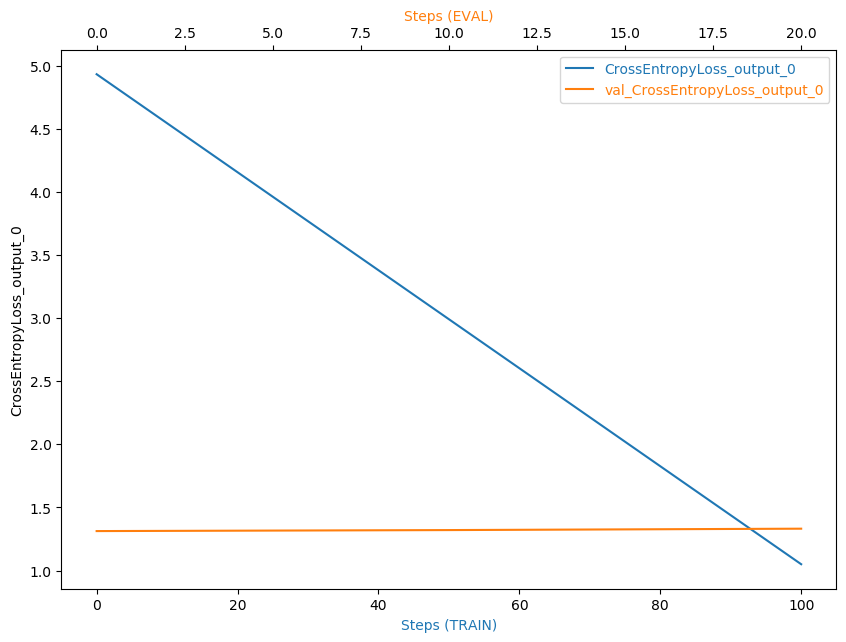

In [112]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot


def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print(vals_train)
    print(steps_train)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("completed TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()

plot_tensor(trial, "CrossEntropyLoss_output_0")

In [113]:
# TODO: Plot a debugging output.

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [114]:
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
print(f"You will find the profiler report in {rule_output_path}")

You will find the profiler report in s3://sagemaker-us-east-1-205796979488/smdebugger-mnist-pytorch-2022-08-23-09-26-55-863/rule-output


In [115]:
! aws s3 ls {rule_output_path} --recursive

2022-08-23 09:42:41     414849 smdebugger-mnist-pytorch-2022-08-23-09-26-55-863/rule-output/ProfilerReport/profiler-output/profiler-report.html
2022-08-23 09:42:41     269456 smdebugger-mnist-pytorch-2022-08-23-09-26-55-863/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2022-08-23 09:42:36        192 smdebugger-mnist-pytorch-2022-08-23-09-26-55-863/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2022-08-23 09:42:36      31534 smdebugger-mnist-pytorch-2022-08-23-09-26-55-863/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2022-08-23 09:42:36       1957 smdebugger-mnist-pytorch-2022-08-23-09-26-55-863/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2022-08-23 09:42:36        328 smdebugger-mnist-pytorch-2022-08-23-09-26-55-863/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2022-08-23 09:42:36       4151 smdebugger-mnist-pytorch-2022-08-23-09-26-55-86

In [116]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-205796979488/smdebugger-mnist-pytorch-2022-08-23-09-26-55-863/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json to ProfilerReport/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-1-205796979488/smdebugger-mnist-pytorch-2022-08-23-09-26-55-863/rule-output/ProfilerReport/profiler-output/profiler-report.html to ProfilerReport/profiler-output/profiler-report.html
download: s3://sagemaker-us-east-1-205796979488/smdebugger-mnist-pytorch-2022-08-23-09-26-55-863/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json to ProfilerReport/profiler-output/profiler-reports/Dataloader.json
download: s3://sagemaker-us-east-1-205796979488/smdebugger-mnist-pytorch-2022-08-23-09-26-55-863/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json to ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
download: s3://sagemaker-us-east-1-205796979488/smde

In [117]:
import os

# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

In [118]:
import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

## Model Deploying

In [124]:
# TODO: Deploy your model to an endpoint
predictor = estimator.deploy(initial_instance_count=1, instance_type="ml.g4dn.xlarge")

---------!

In [135]:
from sagemaker.serializers import IdentitySerializer
import base64

predictor.serializer = IdentitySerializer("image/jpeg")
with open("./test_dir/Beagle_01126.jpg", "rb") as f:
    payload = f.read()

    
inference_1 = predictor.predict(payload)
print(inference_1)

ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received server error (0) from primary with message "Your invocation timed out while waiting for a response from container primary. Review the latency metrics for each container in Amazon CloudWatch, resolve the issue, and try again.". See https://us-east-1.console.aws.amazon.com/cloudwatch/home?region=us-east-1#logEventViewer:group=/aws/sagemaker/Endpoints/smdebugger-mnist-pytorch-2022-08-23-10-13-07-491 in account 205796979488 for more information.

In [ ]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()